In [1]:
import pandas as pd

from utils.LabelsDict import tickers
from utils.load_data import *

import warnings
warnings.filterwarnings("ignore", category=UserWarning, message="Unable to import Axes3D")

!pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable


2025-05-01 13:36:37,286:utils.portfolio:INFO: ============================================================
2025-05-01 13:36:37,288:utils.portfolio:INFO: ANALYSIS STARTED | Python 3.10.12 (main, Feb  4 2025, 14:57:36) [GCC 11.4.0] | Matplotlib 3.10.1
2025-05-01 13:36:37,290:utils.portfolio:INFO: ============================================================
2025-05-01 13:36:37,296:utils.portfolio:INFO: Stocks data loaded from backup | Records: 855
2025-05-01 13:36:37,697:utils.portfolio:INFO: Multipliers data loaded | Features: ['ticker', 'year', 'quarter', 'EV/EBITDA', 'P/BV', 'P/E', 'P/FCF', 'P/S', 'Долг, млрд руб', 'Долг/EBITDA', 'Капитализация, млрд руб', 'Чистый долг, млрд руб']
2025-05-01 13:36:37,706:utils.portfolio:INFO: Portfolio created | Companies: 15
2025-05-01 13:36:37,730:utils.portfolio:INFO: Column types adjusted: ['Долг, млрд руб', 'Капитализация, млрд руб', 'Чистый долг, млрд руб', 'high', 'low', 'close', 'EV/EBITDA', 'P/BV', 'P/E', 'P/S', 'open', 'Долг/EBITDA']
2025-05-

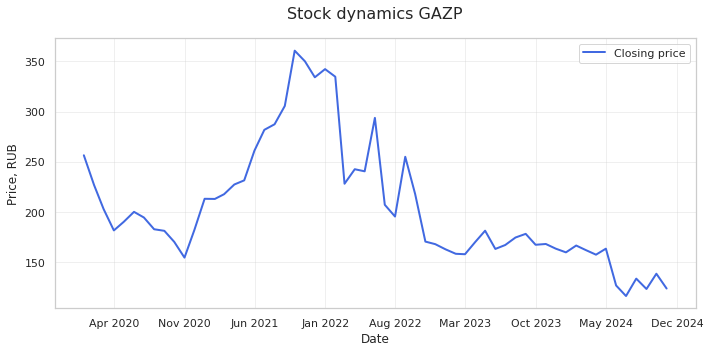

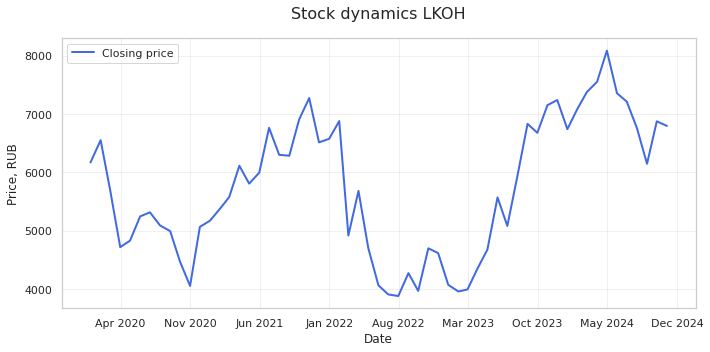

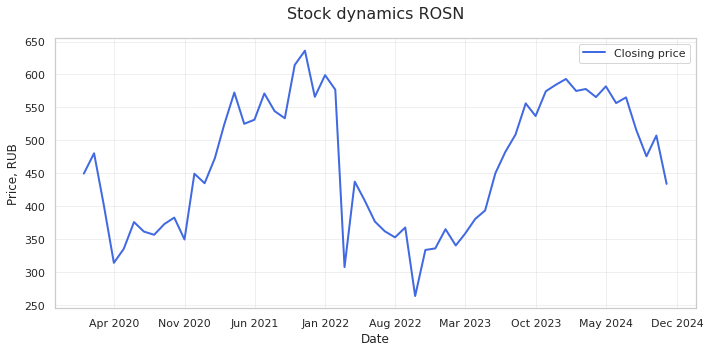

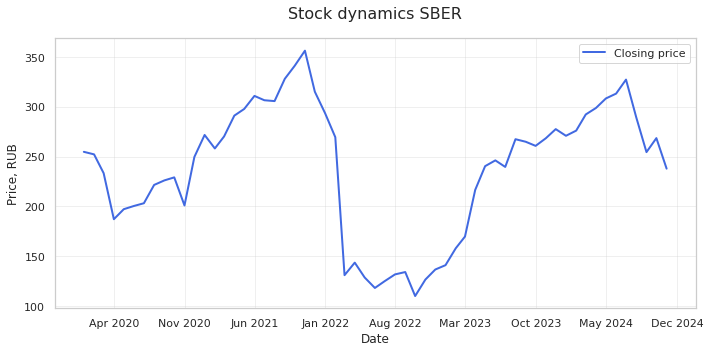

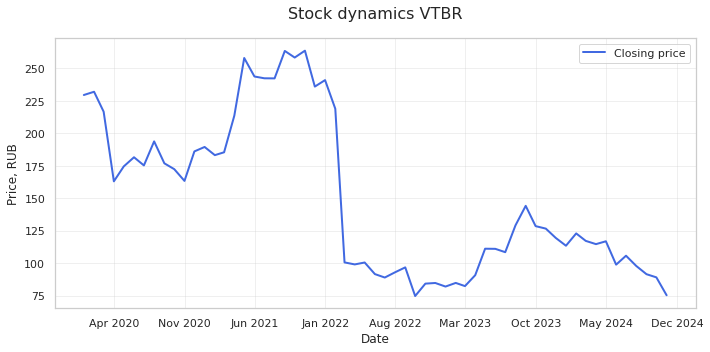

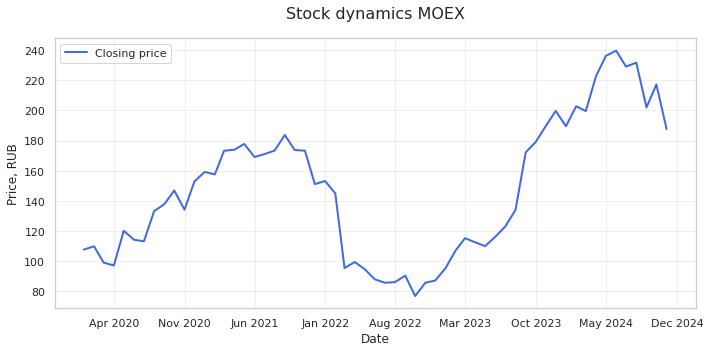

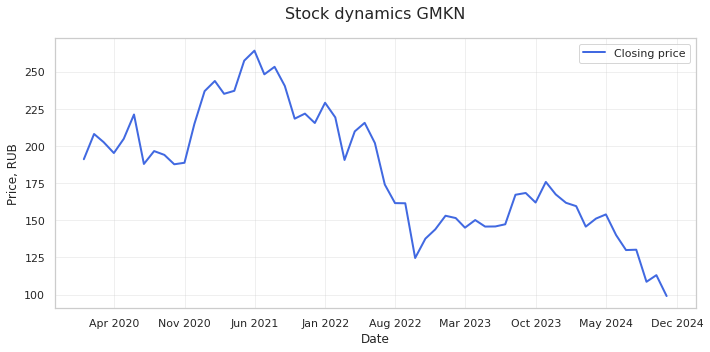

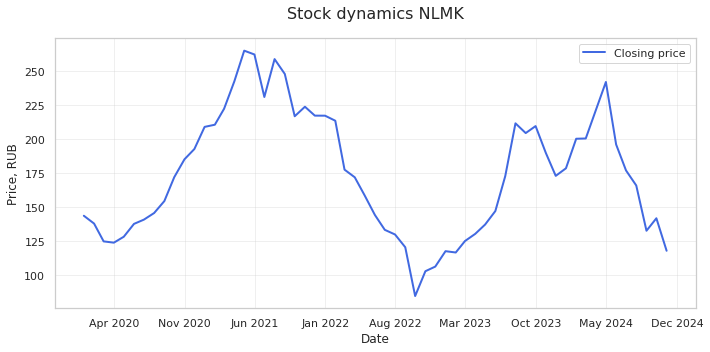

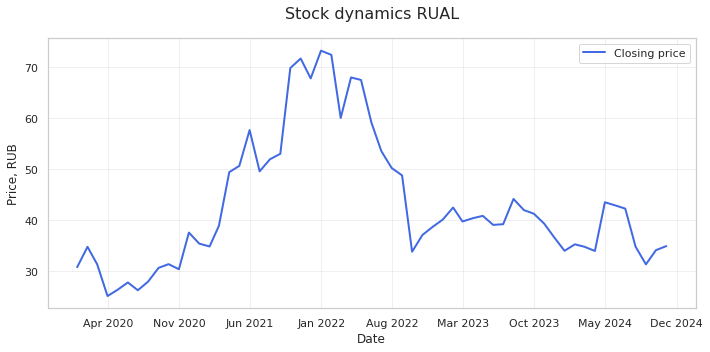

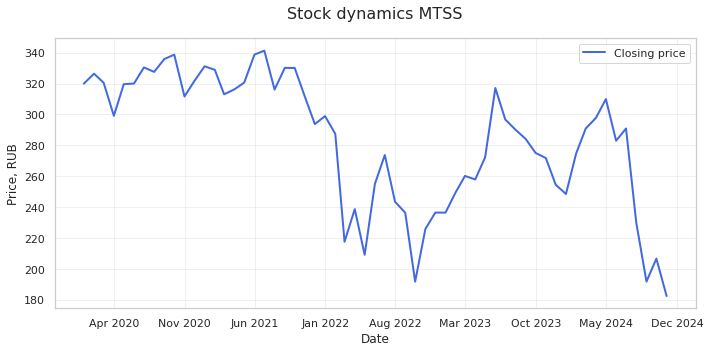

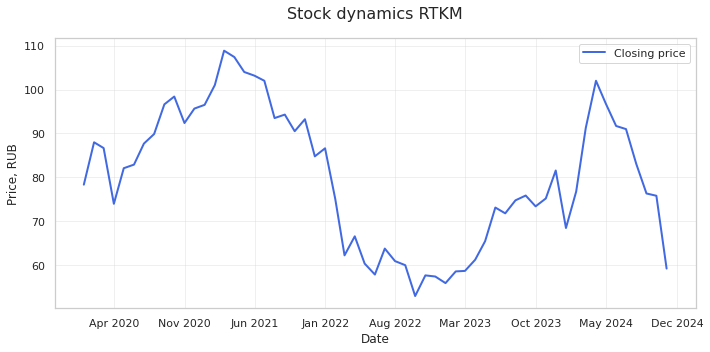

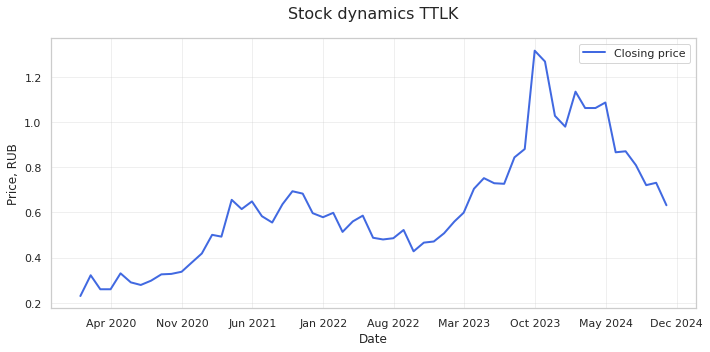

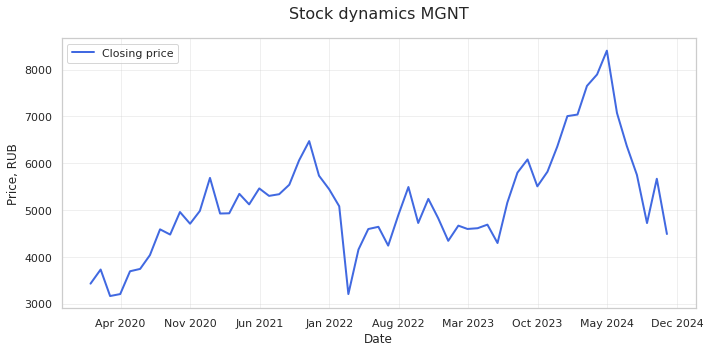

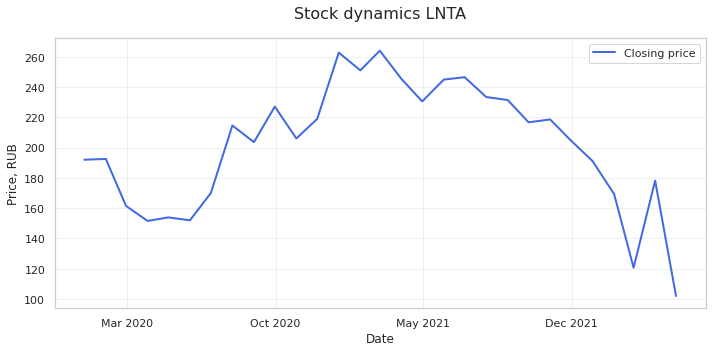

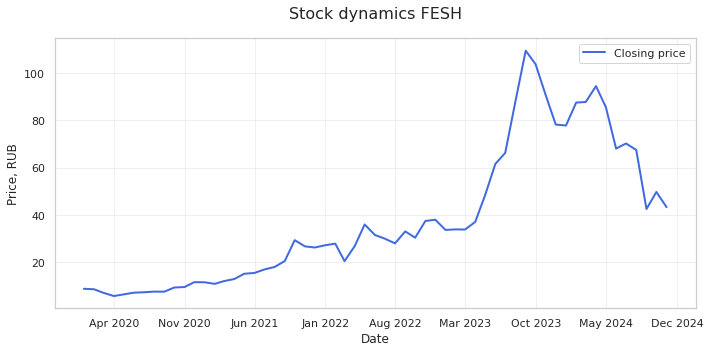

2025-05-01 13:36:58,489:utils.portfolio:INFO: Stock prices graphs saved | Companies: 15 | Path: logs/graphs/


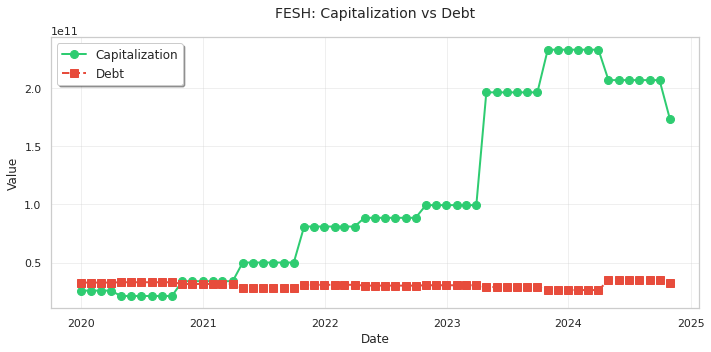

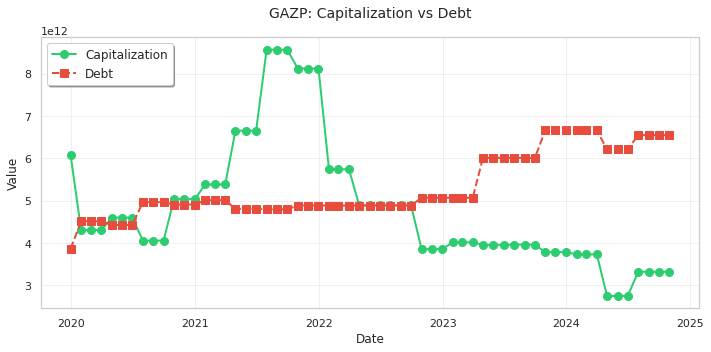

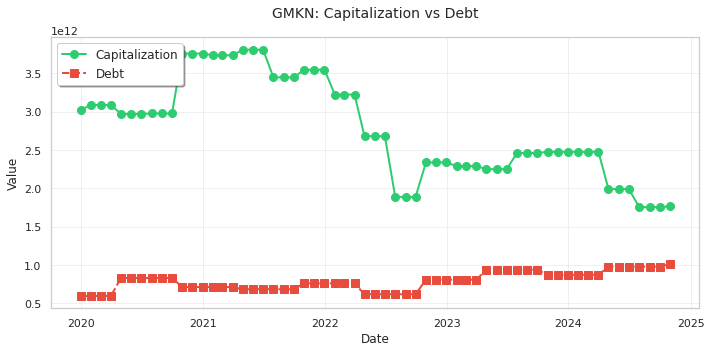

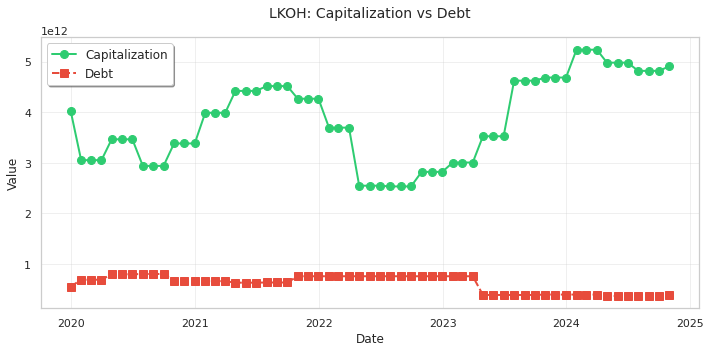

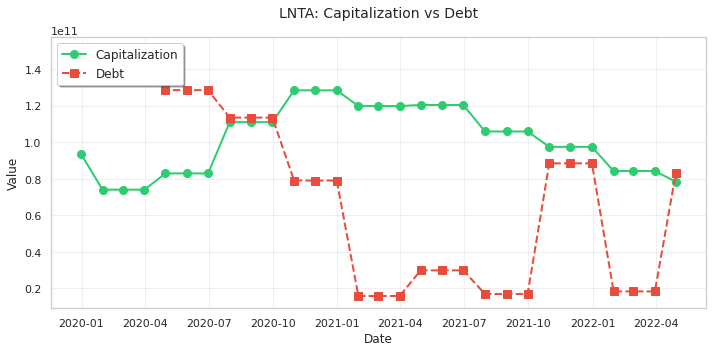

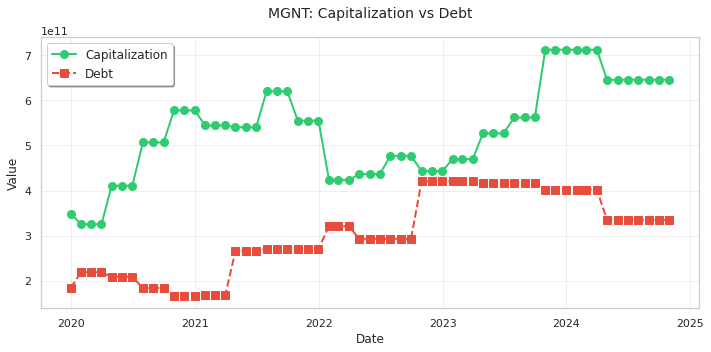

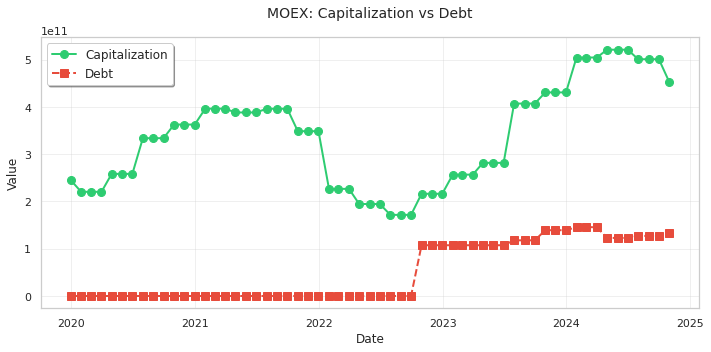

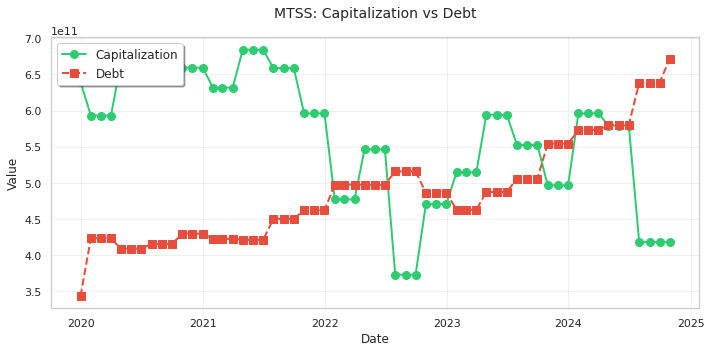

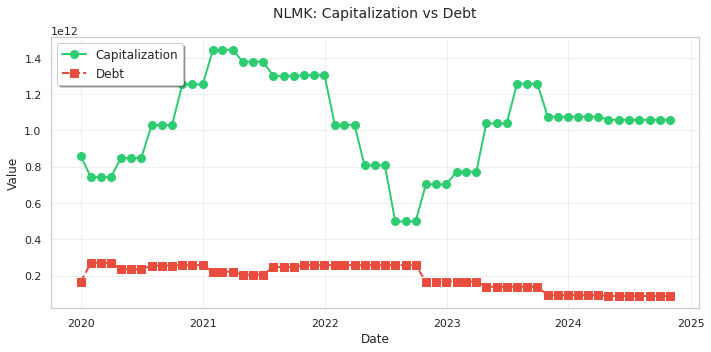

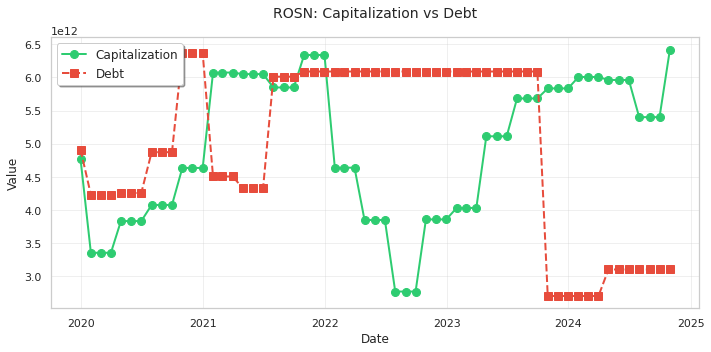

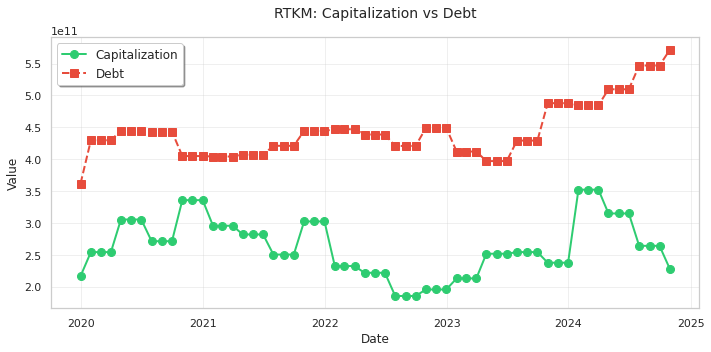

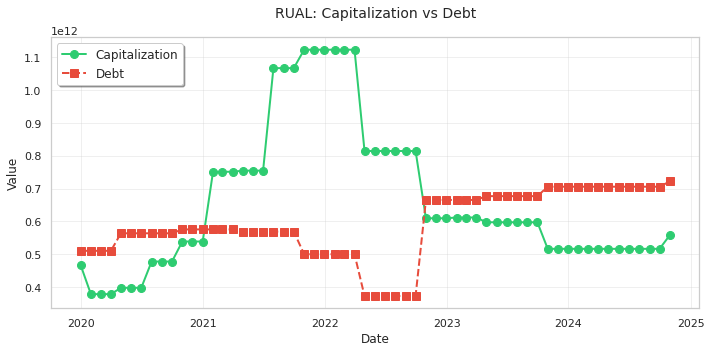

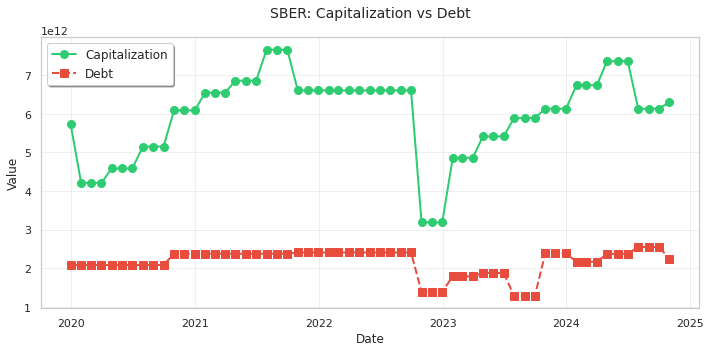

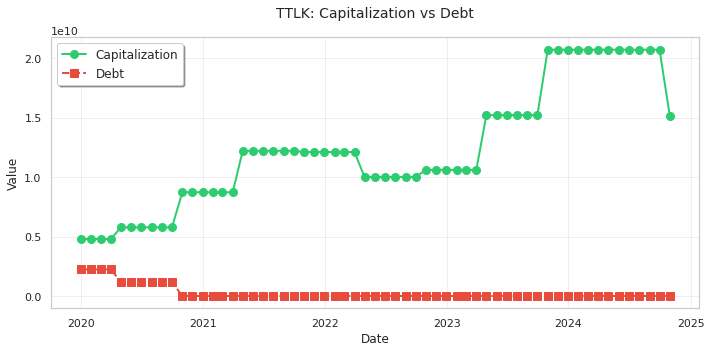

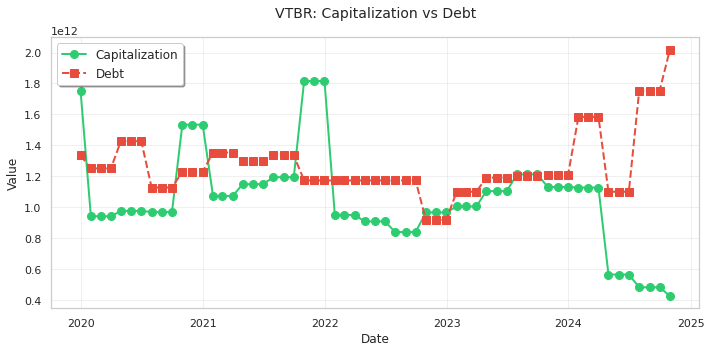

2025-05-01 13:37:10,004:utils.portfolio:INFO: Capitalization-debt graphs saved | Companies: 15 | Path: logs/graphs/debt_catitalization.png
2025-05-01 13:37:10,266:utils.portfolio:INFO: Optimal lag number calculated | Optimal number of lags: 6


<Figure size 720x360 with 0 Axes>

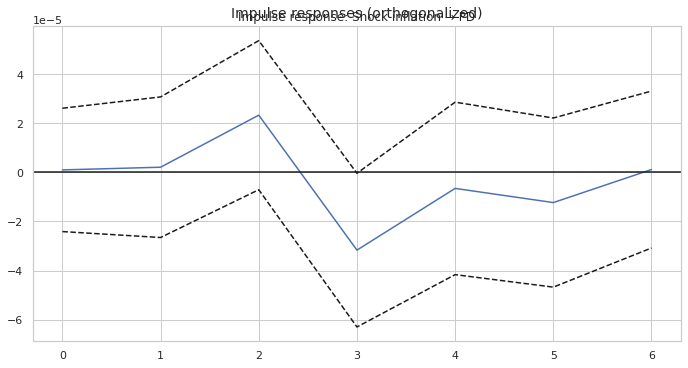

<Figure size 720x360 with 0 Axes>

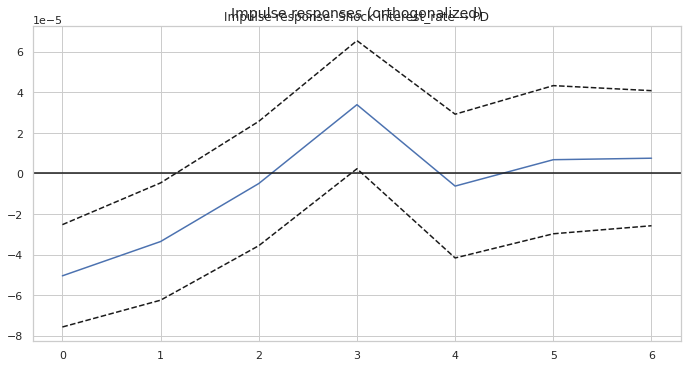

2025-05-01 13:37:13,382:utils.portfolio:INFO: Correlation matrix saved | Path: logs/graphs/corr_matrix.png


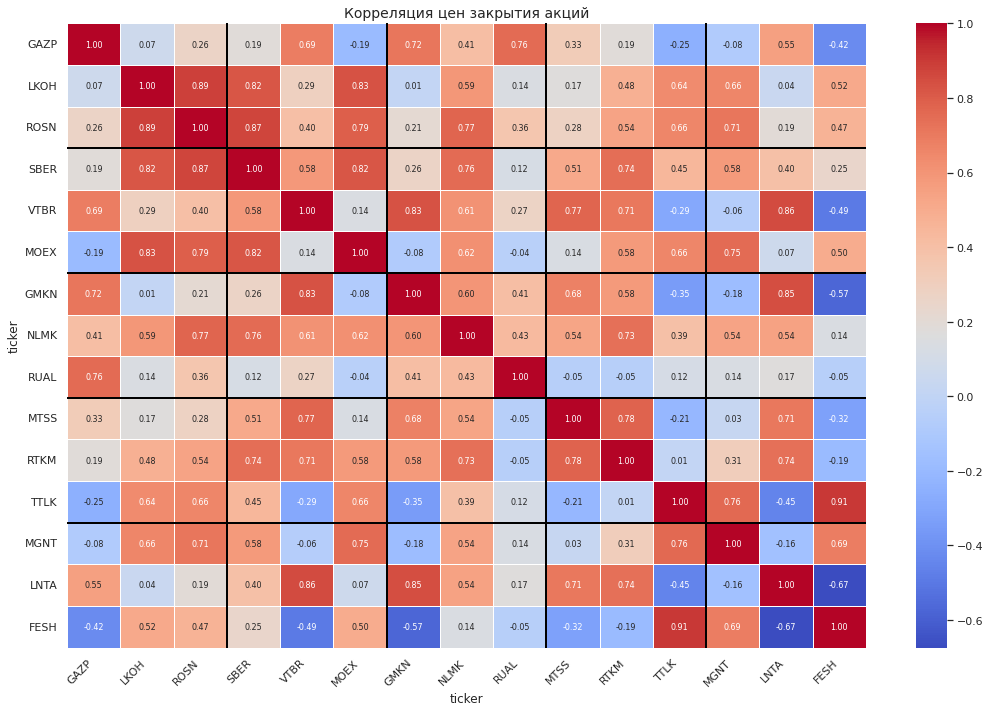

In [ ]:
from utils.logger import Logger

log = Logger(__name__).get_logger()

from utils.portfolio import Portfolio

tickers_list= [
     # Нефтегазовая отрасль
    'GAZP', 'LKOH', 'ROSN',
    # Финансовый сектор (банки, биржи)
    'SBER', 'VTBR', 'MOEX',
    # Металлургия и горнодобывающая промышленность
    'GMKN', 'NLMK', 'RUAL',
    # Телекоммуникации
    'MTSS', 'RTKM', 'TTLK',
    # Розничная торговля/Потребительские товары
    'MGNT', 'LNTA', 'FESH',
]

calc = Portfolio(
    dt_calc='30.10.2024',
    dt_start='03.11.2019', # максимальная глубина, которая есть на Финам
    stocks_step=10,
    tickers_list=tickers_list
)

calc = (
    calc
    .log_system_info()
    .load_stock_data(                                         # загрузка рыночных данных цен закрытия компаний
        use_backup_data=True,                                 # загружать данные из backup копии
        create_backup=False                                   # обновить backup копию (в случае есть получены новые данные)
    )
    .load_multipliers()                                       # выделить мультипликаторы из МСФО
    .create_portfolio()                                       # создать портфель с загруженными данными
    .adjust_portfolio_data_types()                            # провести настройку форматов дат и типов данных
    .add_macro_data()                                         # загрузить макропараметры
    .fill_missing_values()                                    # обработать пропуски в данных
    .add_dynamic_features()                                   # проставить динамические признаки по дате, например, квартал
    .add_merton_pd()                                          # выполнить расчет вероятности дефолта по формуле Мертона
    .plot_pd_by_tickers(tickers=tickers_list, verbose=False)  # нарисовать графики для вероятностей дефолта
    .plot_stocks(tickers=tickers_list, verbose=True)          # нарисовать динамику котировок акций
    .plot_debt_capitalization(verbose=True)                   # нарисовать динамику долга и стоимости активов
    # расчитать функции импульсного отклика
    .calc_irf(impulses_responses = {
        'inflation': 'PD', 'interest_rate': 'PD'
    }, verbose=True)
    .plot_correlation_matrix(custom_order = [ # нарисовать матрицу корреляций
        'GAZP', 'LKOH', 'ROSN',# Нефтегазовая отрасль
        'SBER', 'VTBR', 'MOEX',# Финансовый сектор
        'GMKN', 'NLMK', 'RUAL',# Металлургия
        'MTSS', 'RTKM', 'TTLK',# Телекоммуникации
        'MGNT', 'LNTA', 'FESH' # Розничная торговля
    ], verbose=True)
    .calc_macro_connections()
    .log_completion()
)

In [ ]:
calc.macro_connection_summary